In [ ]:
import pandas as pd



# this only pulls the first 1000 rows. if you want the whole dataset take out the nrows = 1000
data=pd.read_csv('311_Service_Requests_from_2010_to_Present.tsv',delimiter='\t',encoding='utf-8-sig',low_memory=False, index_col  = 'Unique Key')
#we will use sample() function to select a random sample of size equivalent to 15% of the size of the dataset
df1 = data.sample(frac =.15, replace=True)


df.tail(1) #last N rows


##### cleaned the dataset
##### Took out some columns
##### took out some Agancys that dosen't have data or unclear data
##### last update 30/11/2019

In [ ]:
df2 = df1.copy()
df2.to_csv(r'C:\Users\faris\311_sample.csv')

In [7]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


#df = pd.read_csv('311_sample.csv')

In [8]:
df = pd.read_csv('311_sample.csv'  , low_memory=False, index_col  = 'Unique Key' )

 

In [119]:
df.shape

(382355, 40)

In [9]:
df= df[['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 
       'Resolution Description', 'Borough', 'Open Data Channel Type']]

In [10]:
df.tail()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Resolution Description,Borough,Open Data Channel Type
Unique Key,,,,,,,,,,,
41992161,03/18/2019 07:48:00 PM,03/22/2019 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,10011,NaN,MANHATTAN,PHONE
42697801,05/14/2019 05:55:10 PM,05/17/2019 09:46:18 PM,HPD,Department of Housing Preservation and Develop...,GENERAL,COOKING GAS,RESIDENTIAL BUILDING,10458,The Department of Housing Preservation and Dev...,BRONX,PHONE
41176394,12/13/2018 12:06:00 PM,12/14/2018 01:10:00 PM,DEP,Department of Environmental Protection,Water System,Dirty Water (WE),NaN,10302,The Department of Environment Protection inspe...,STATEN ISLAND,ONLINE
43006167,06/18/2019 09:45:00 AM,06/18/2019 12:00:00 PM,DSNY,BCC - Staten Island,Derelict Vehicles,14 Derelict Vehicles,Street,10306,The Department of Sanitation removed the items.,STATEN ISLAND,PHONE
40741764,11/04/2018 08:05:42 PM,11/05/2018 02:18:32 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11375,The Police Department responded to the complai...,QUEENS,PHONE


In [92]:
df = df[df['Agency']!='DVS']
df = df[df['Agency']!='TAX']
df = df[df['Agency']!='DCAS']
df = df[df['Agency']!='ACS']
df = df[df['Agency']!='COIB']
#these agancys have some missing data or unclear at all informtion
df.shape



(382188, 20)

In [11]:
#adding the new dates column

df['just_time_open'] = pd.to_datetime(df['Created Date']).dt.strftime('%H:%M:%S')
df['just_close'] = pd.to_datetime(df['Closed Date'])
df['just_open'] = pd.to_datetime(df['Created Date'])
df['day of the week Open'] =  df['just_open'].dt.day_name()
df['day of the week close'] =  df['just_close'].dt.day_name()
df['Days to Close a Complaint' ] = -(df["just_open"] - df["just_close"]).astype("timedelta64[D]")
df['Month_open'] = df['just_open'].dt.month
 #https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name
# changes the months numbers to months names
df['Month_open'] = df['Month_open'].apply(lambda x: calendar.month_abbr[x])


df.dtypes
#df.tail(10)

Created Date                         object
Closed Date                          object
Agency                               object
Agency Name                          object
Complaint Type                       object
Descriptor                           object
Location Type                        object
Incident Zip                         object
Resolution Description               object
Borough                              object
Open Data Channel Type               object
just_time_open                       object
just_close                   datetime64[ns]
just_open                    datetime64[ns]
day of the week Open                 object
day of the week close                object
Days to Close a Complaint           float64
Month_open                           object
dtype: object

In [91]:
df.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Resolution Description,Borough,Open Data Channel Type,just_time_open,just_close,just_open,day of the week Open,day of the week close,Days to Close a Complaint,Month_open,Part of day close,Part of day open
Unique Key,,,,,,,,,,,,,,,,,,,,
40955843,11/16/2018 10:38:06 PM,11/20/2018 02:07:48 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10451,The Department of Housing Preservation and Dev...,BRONX,PHONE,22:38:06,2018-11-20 02:07:48,2018-11-16 22:38:06,Friday,Tuesday,4.0,Nov,Night,Evening
43346984,07/22/2019 02:28:34 AM,07/22/2019 09:10:37 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10451,The Police Department responded to the complai...,BRONX,MOBILE,02:28:34,2019-07-22 21:10:37,2019-07-22 02:28:34,Monday,Monday,1.0,Jul,Evening,Night
42059386,03/26/2019 09:36:43 PM,03/27/2019 09:18:23 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10016,The Department of Housing Preservation and Dev...,MANHATTAN,PHONE,21:36:43,2019-03-27 21:18:23,2019-03-26 21:36:43,Tuesday,Wednesday,1.0,Mar,Evening,Evening
43246439,07/10/2019 04:05:51 AM,07/10/2019 10:03:05 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11354,The Police Department issued a summons in resp...,QUEENS,PHONE,04:05:51,2019-07-10 10:03:05,2019-07-10 04:05:51,Wednesday,Wednesday,1.0,Jul,Morning,Night
42920377,06/09/2019 06:34:13 PM,06/09/2019 07:14:25 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10469,The Police Department responded to the complai...,BRONX,MOBILE,18:34:13,2019-06-09 19:14:25,2019-06-09 18:34:13,Sunday,Sunday,1.0,Jun,Evening,Afternoon


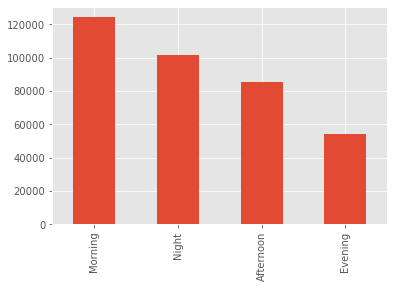

In [12]:

#part of day for calling and making a 311 requst
df_close = df['just_close']
#print (df)
#
df_close_cut=pd.cut(df_close.dt.hour,
               [0,6,12,18,23],
               labels=['Night','Morning','Afternoon','Evening'],
               include_lowest=True)
#
df['Part of day close'] =  df_close_cut
df_close_cut.value_counts().plot.bar()

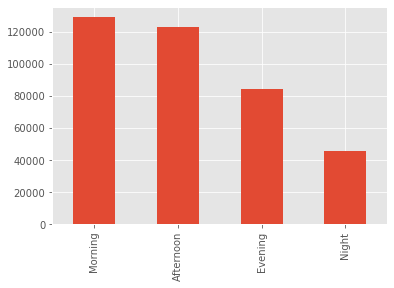

In [13]:
#part of day for calling and making a 311 requst
df_open = df['just_open']
#print (df)
#
df_open_cut=pd.cut(df_open.dt.hour,
               [0,6,12,18,23],
               labels=['Night','Morning','Afternoon','Evening'],
               include_lowest=True)
#
df['Part of day open'] =  df_open_cut
df_open_cut.value_counts().plot.bar()

In [194]:
df_open_cut.value_counts()

Morning      129200
Afternoon    122913
Evening       84742
Night         45500
Name: just_open, dtype: int64

In [195]:
df_close_cut.value_counts()

Morning      124286
Night        101482
Afternoon     85749
Evening       54278
Name: just_close, dtype: int64

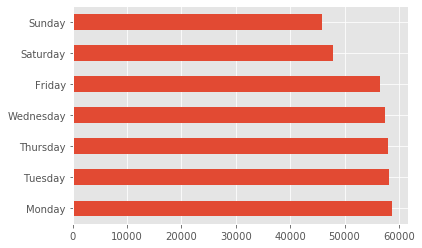

In [196]:
df['day of the week Open'].value_counts().plot.barh()


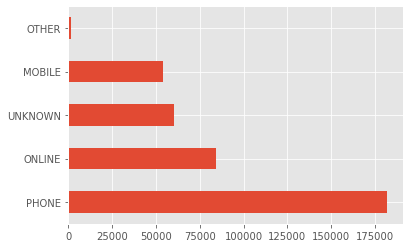

In [197]:
# whats mobile and how its deffrent than phone?
#other/ unkonwn?
df['Open Data Channel Type'].value_counts().plot.barh()



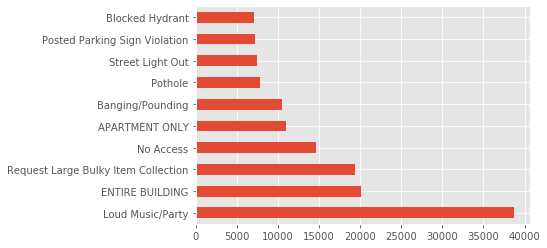

In [164]:
df['Descriptor'].value_counts().head(10).plot.barh()

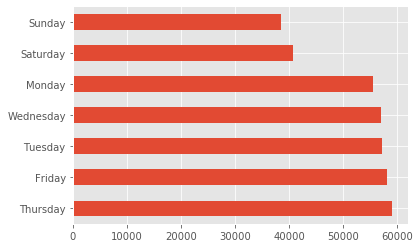

In [19]:
df['day of the week close'].value_counts().plot.barh()

In [2]:
Count = pd.value_counts(df['Complaint Type'].head(10), sort=True)


Count.plot.barh( figsize=(12,7), rot = 0)

NameError: name 'pd' is not defined

In [26]:

df['Days to Close a Complaint' ].describe()

count    365795.000000
mean          8.437513
std          21.194896
min         -54.000000
25%           1.000000
50%           1.000000
75%           5.000000
max         370.000000
Name: Days to Close a Complaint, dtype: float64

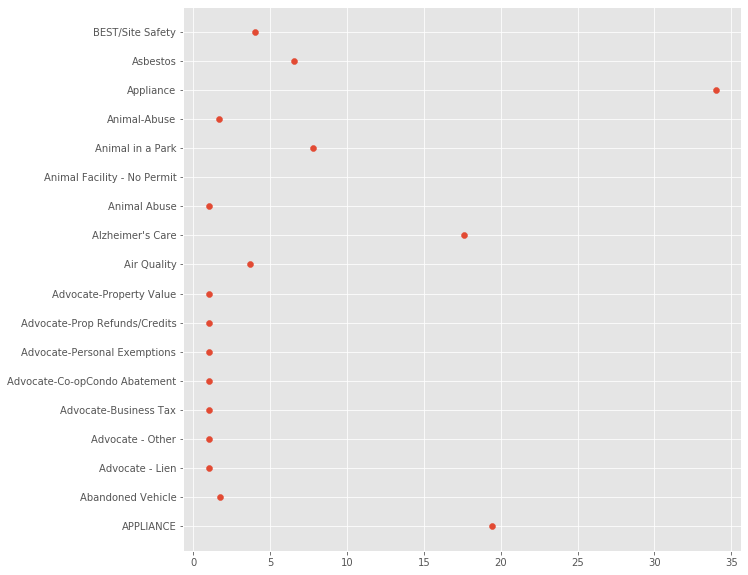

In [22]:


plt_scatter = df['Days to Close a Complaint' ].groupby(df['Complaint Type' ]).mean().head(25)
plt.figure(figsize=(10, 10))
plt.scatter(plt_scatter, plt_scatter.index)



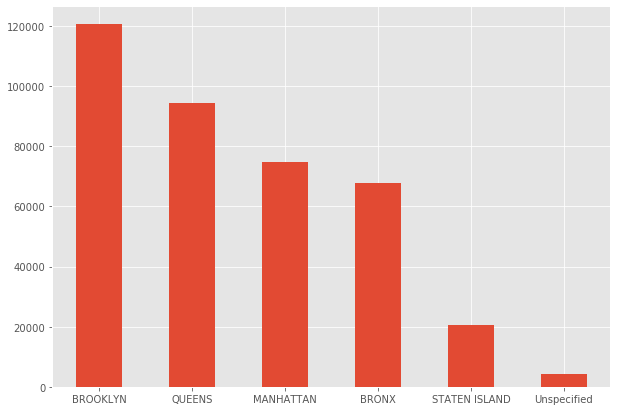

In [206]:
df['Borough'].value_counts().plot.bar( figsize=(10,7), rot = 0)
# Who has the most complaint in nyc

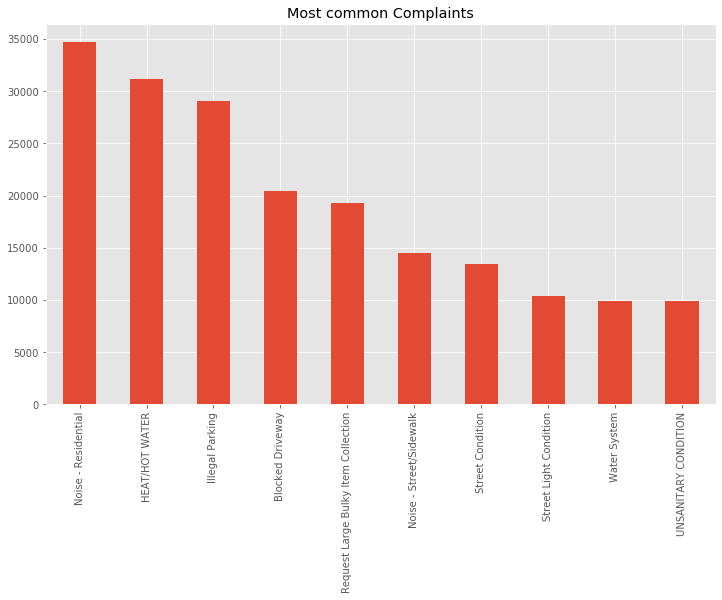

In [205]:
df['Complaint Type'].value_counts().head(10).plot(kind='bar',
                    figsize=(12,7), title = 'Most common Complaints')

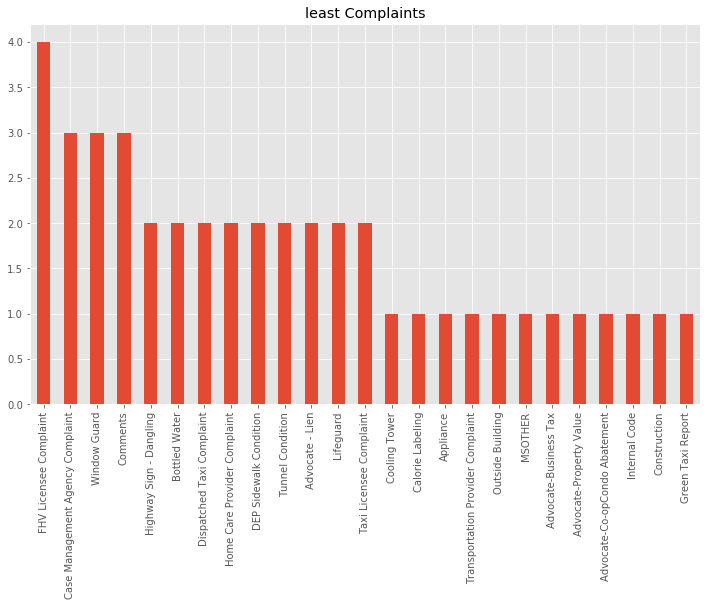

In [49]:
df['Complaint Type'].value_counts().tail(25).plot(kind='bar',
                    figsize=(12,7), title = 'least Complaints')

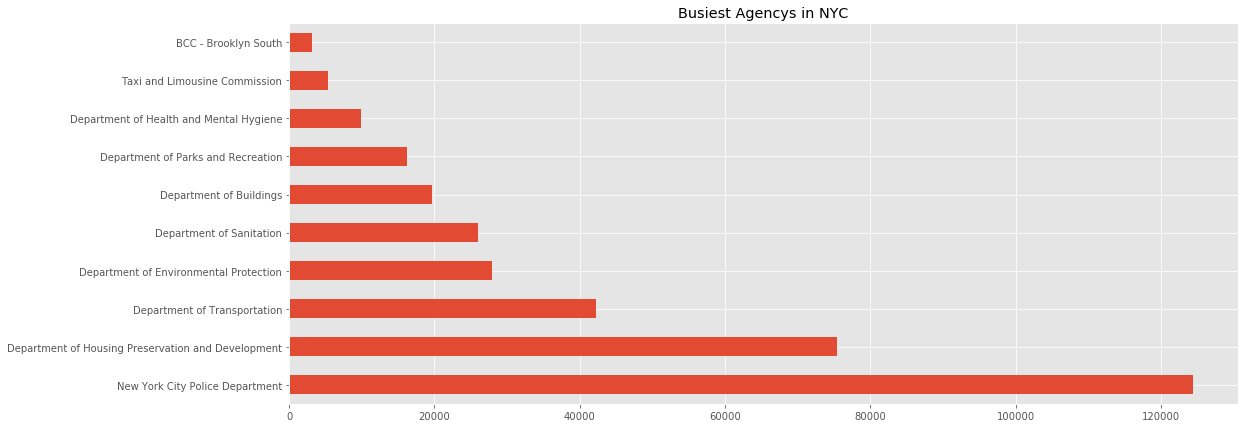

In [211]:
df['Agency Name'].value_counts().head(10).plot(kind='barh',
                    figsize=(17,7), title = 'Busiest Agencys in NYC')

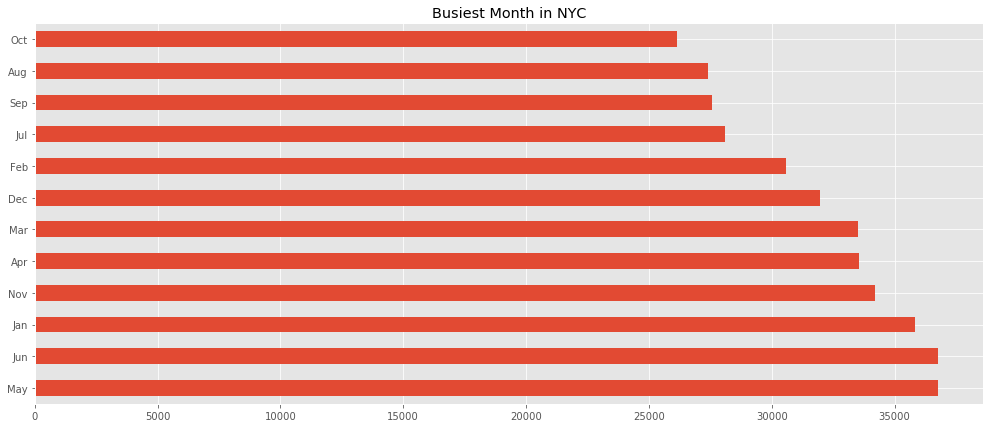

In [212]:
df['Month_open'].value_counts().plot(kind='barh',
                    figsize=(17,7), title = 'Busiest Month in NYC')

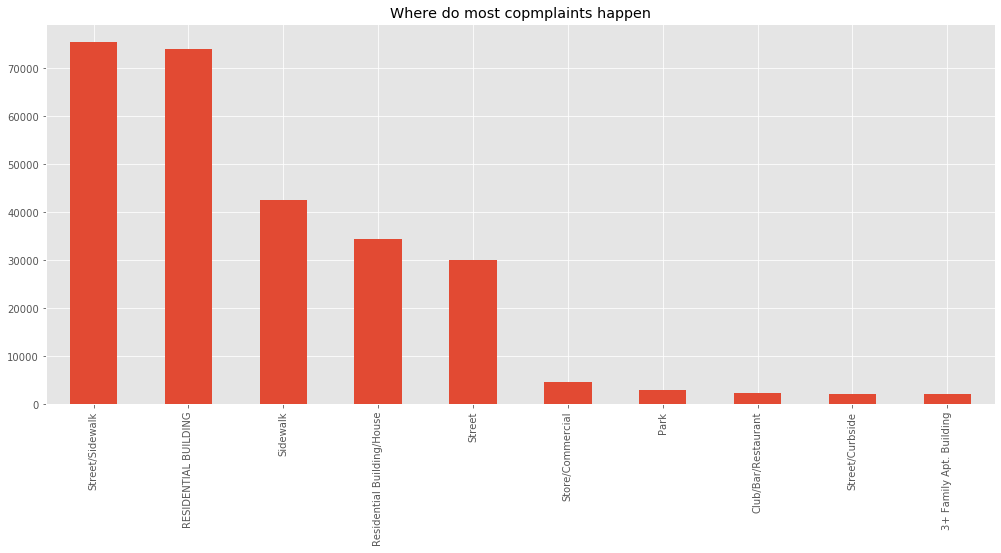

In [213]:
df['Location Type' ].value_counts().head(10).plot(kind='bar',
                    figsize=(17,7), title = 'Where do most copmplaints happen')

In [214]:
df_Brooklyn = df[df['Borough']=='BROOKLYN']

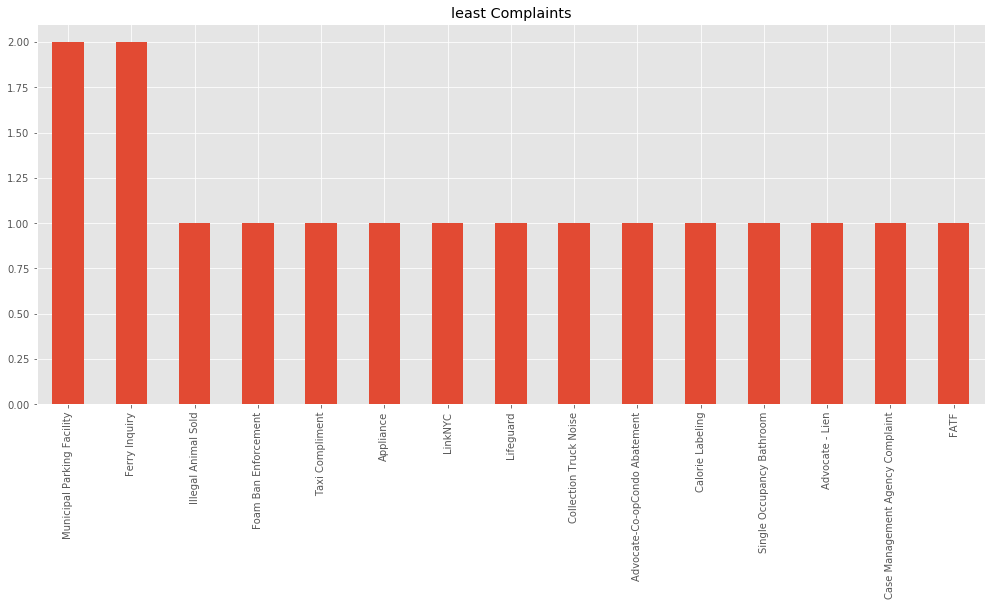

In [139]:
df_Brooklyn['Complaint Type'].value_counts().tail(15).plot(kind='bar',
                    figsize=(17,7), title = 'least Complaints')

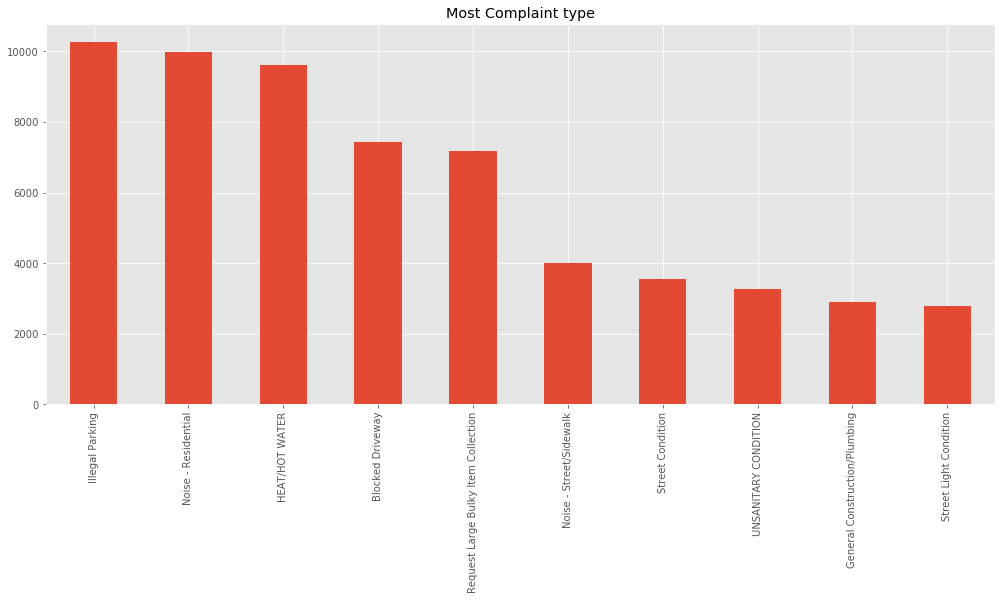

In [140]:
df_Brooklyn['Complaint Type'].value_counts().head(10).plot(kind='bar',
                    figsize=(17,7), title = 'Most Complaint type')

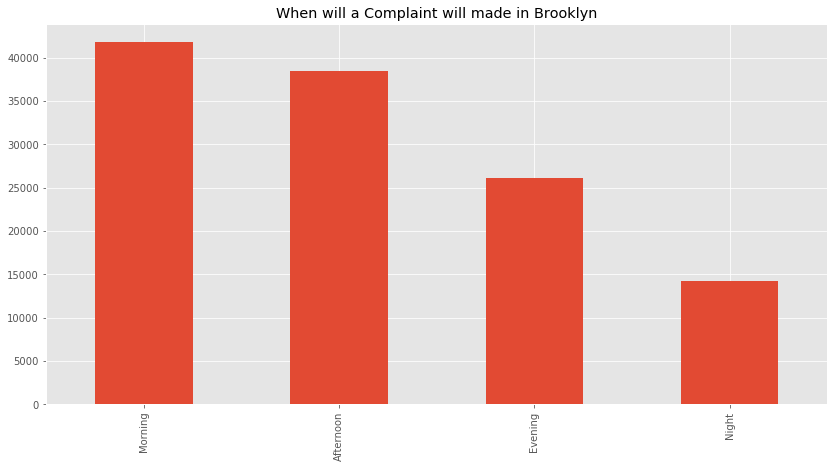

In [32]:
df_Brooklyn['Part of day open'].value_counts().head(25).plot(kind='bar',
                    figsize=(14,7), title = 'When will a Complaint will made in Brooklyn')

In [15]:
df_NYCPD=  df[df['Agency']=='NYPD']

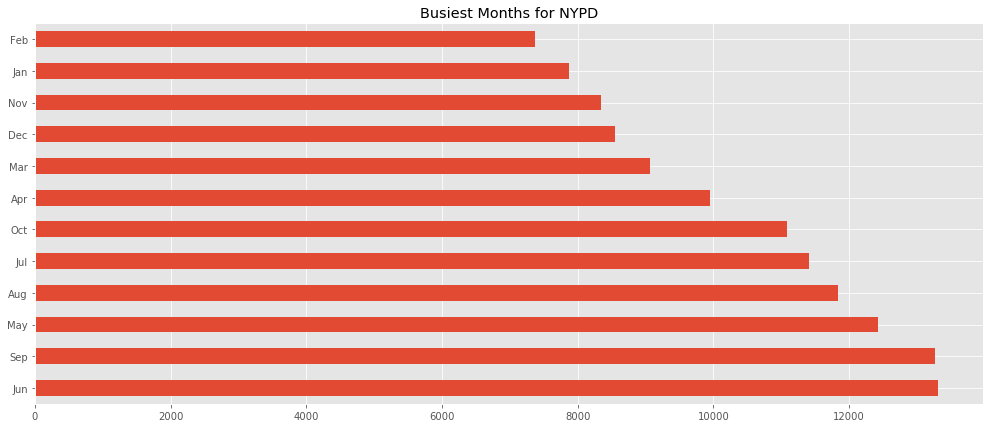

In [16]:
df_NYCPD['Month_open'].value_counts().plot(kind='barh',
                    figsize=(17,7), title = 'Busiest Months for NYPD')

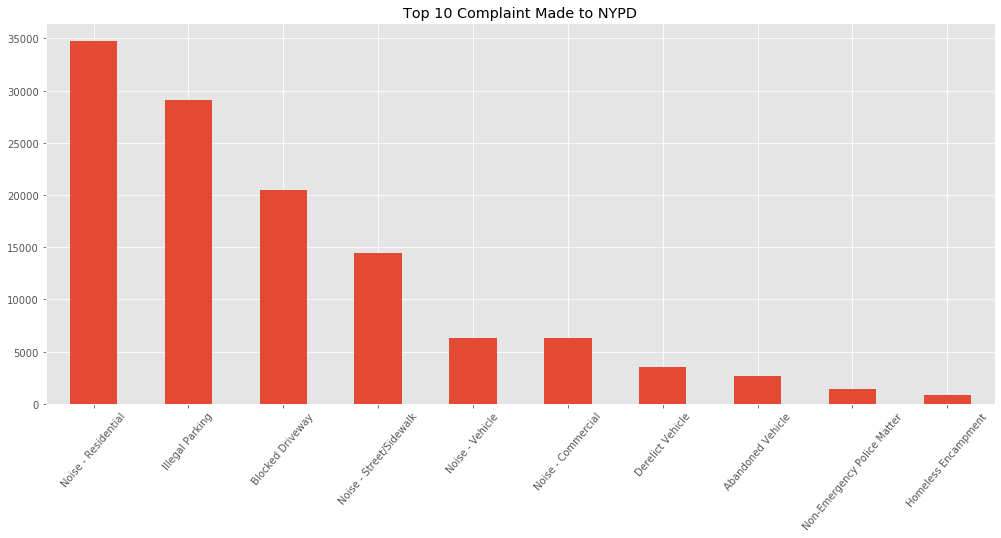

In [96]:
df_NYCPD['Complaint Type'].value_counts().head(10).plot(kind='bar',
                    figsize=(17,7), rot = 50, title = 'Top 10 Complaint Made to NYPD')

In [36]:
df_NYCPD['Days to Close a Complaint' ].groupby(df['Complaint Type' ]).mean()

Complaint Type
Abandoned Vehicle              1.699736
Animal Abuse                   1.042120
Animal-Abuse                   1.693587
Bike/Roller/Skate Chronic      1.010101
Blocked Driveway               1.191525
Derelict Vehicle               1.145263
Disorderly Youth               1.000000
Drinking                       1.186441
Drug Activity                  1.211594
Graffiti                       1.086207
Homeless Encampment            1.168966
Illegal Fireworks              1.535714
Illegal Parking                1.189725
Noise - Commercial             1.130941
Noise - House of Worship       1.017241
Noise - Park                   1.032423
Noise - Residential            1.088997
Noise - Street/Sidewalk        1.112548
Noise - Vehicle                1.080305
Non-Emergency Police Matter    1.297186
Panhandling                    1.007042
Posting Advertisement          1.000000
Traffic                        1.008108
Urinating in Public            1.152174
Vending                  

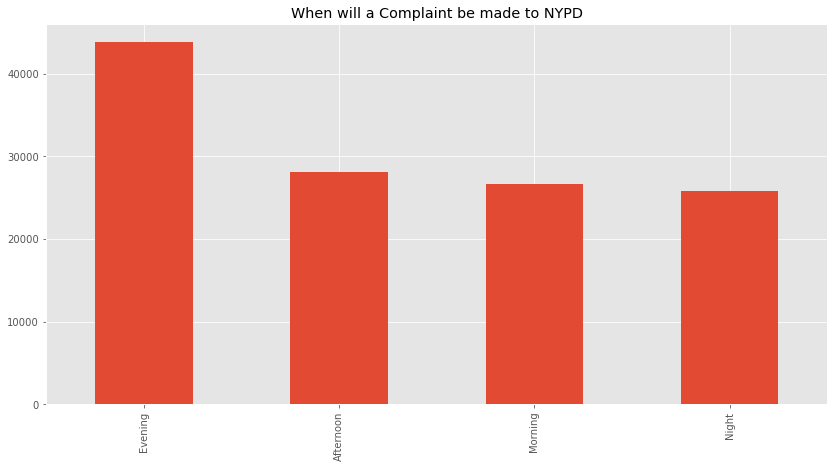

In [37]:
df_NYCPD['Part of day open'].value_counts().plot(kind='bar',
                    figsize=(14,7), title = 'When will a Complaint be made to NYPD')

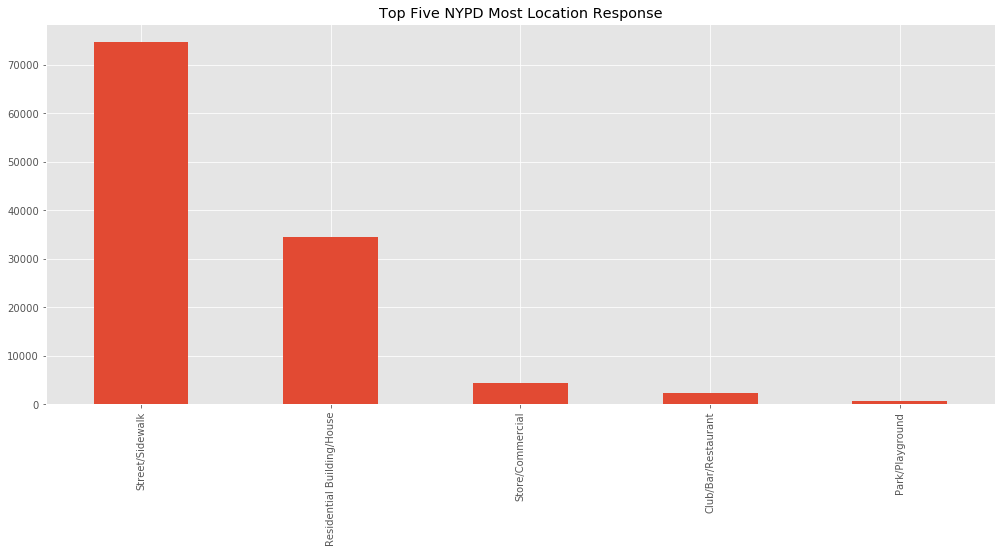

In [18]:
df_NYCPD['Location Type' ].value_counts().head(5).plot(kind='bar',
                    figsize=(17,7), title = 'Top Five NYPD Most Location Response')

In [98]:
df['Agency'].value_counts()/len(df['Agency'])*100

NYPD     32.568526
HPD      19.723801
DSNY     12.808879
DOT      11.065235
DEP       7.292223
DOB       5.130983
DPR       4.251834
DOHMH     2.584854
TLC       1.411609
DOF       1.170628
DHS       0.779721
DCA       0.614619
HRA       0.247522
DFTA      0.178708
EDC       0.087915
DOE       0.059918
DOITT     0.021717
NYCEM     0.001308
Name: Agency, dtype: float64

In [97]:

filter_agancy_top5=['NYPD', 'HPD', 'DSNY', 'DOT', 'DEP']

filter_agancy_bottoms = [ 'DOB', 'DPR', 'DOHMH', 'TLC','DOF','DHS', 'DCA', 'HRA',
                         'DFTA', 'EDC', 'DOE', 'DCAS', 'DOITT','ACS', 'TAX', 'DVS', 'NYCEM', 'COIB']
# we subset the top 5 Agnancys
agancy_top_5 = df[df['Agency'].isin(filter_agancy_top5)]
# we subset the bottom Agnancys
agancy_others = df[df['Agency'].isin(filter_agancy_bottoms)] 
# change the name of the bottom agancys to other 
agancy_others['Agency'] = "Other"
#agancy_other.tail()
# adding the two datafreams
agancy_clean_concat = pd.concat ([agancy_top_5 , agancy_others ])


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [101]:
#the sizes of the Agency  in percentages
agancy_clean_concat['Agency'].value_counts()/len(agancy_clean_concat['Agency'])*100

NYPD     32.568526
HPD      19.723801
Other    16.541336
DSNY     12.808879
DOT      11.065235
DEP       7.292223
Name: Agency, dtype: float64

In [99]:
df['Agency'].value_counts().index

Index(['NYPD', 'HPD', 'DSNY', 'DOT', 'DEP', 'DOB', 'DPR', 'DOHMH', 'TLC',
       'DOF', 'DHS', 'DCA', 'HRA', 'DFTA', 'EDC', 'DOE', 'DOITT', 'NYCEM'],
      dtype='object')

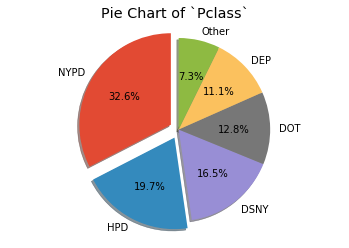

In [100]:
labels = 'NYPD', 'HPD', 'DSNY', 'DOT', 'DEP', 'Other'
# define the sizes of the pie chart in percentages
#sizes = [55.1, 24.2, 20.7]
sizes = agancy_clean_concat['Agency'].value_counts()/len(agancy_clean_concat['Agency'])*100

# set which slice should be seperated/exploded from the other parts of the pie and how much
explode = (0.1,0.1, 0,0,0, 0)  # only "explode" the 1st slice

# Creates just a figure and only one subplot - from the matplotlib library which is a 2D plotting library
# source: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html
fig_Pclass, ax1 = plt.subplots()

# define the pie chart features, define sizes, explode, labels, autopct %, shadow, startangle
ax1.pie(sizes, labels=labels ,explode= explode , autopct='%1.1f%%', shadow=True, startangle=90)

# set the title of the pie chart and the aspect ratio to equal
ax1.set(aspect="equal", title='Pie Chart of `Pclass`') # Equal aspect ratio ensures that pie is drawn as a circle.


#ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        #shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
#plt.tight_layout()
plt.show()
# Plot the Pie-chart of 'Pclass'
#plt.show()

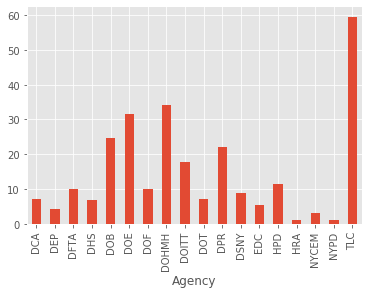

In [90]:
# Days to Close a Complaint by agency
df['Days to Close a Complaint' ].groupby(df['Agency' ]).mean().plot.bar()
